In [1]:
import os

import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch

import sunpy.coordinates  # NOQA
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

import torch

Results from 1 Provider:

1 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2011-01-20T08:15:38Z  SDO/AIA    AIA_4      304    2105


Export request pending. [id=JSOC_20231111_1129, status=2]
Waiting for 0 seconds...
1 URLs found for download. Full request totalling 1MB


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

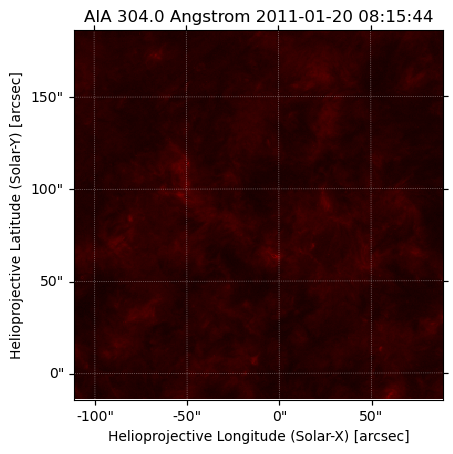

In [21]:
start_time = Time('2011-01-20T09:15:44', scale='utc', format='isot')

bottom_left = SkyCoord(-100*u.arcsec, -100*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
top_right = SkyCoord(500*u.arcsec, 500*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")

jsoc_email = "adrien.joliat@epfl.ch"

cutout = a.jsoc.Cutout(bottom_left=bottom_left, top_right=top_right, tracking=True)

query = Fido.search(
    a.Time(start_time - 1*u.h, start_time + 1*u.h),
    a.Wavelength(304*u.angstrom),
    a.Sample(3*u.h),
    a.jsoc.Series.aia_lev1_euv_12s,
    a.jsoc.Notify(jsoc_email),
    a.jsoc.Segment.image,
    cutout,
)
print(query)
files = Fido.fetch(query)
files.sort()

sequence = sunpy.map.Map(files, sequence=True)

fig = plt.figure()
ax = fig.add_subplot(projection=sequence.maps[0])
sequence.plot(axes=ax, norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))